In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('/kaggle/input/sentiment-analysis-dataset/training.csv',header=None)
validation = pd.read_csv('/kaggle/input/sentiment-analysis-dataset/validation.csv',header=None)

train.columns=['Tweet ID','Entity','Sentiment','Tweet Content']
validation.columns=['Tweet ID','Entity','Sentiment','Tweet Content']

#print("Training DataSet: \n")
train = train.sample(10000)
#display(train.head())
#print("Validation DataSet: \n")
#validation = validation.sample(1000)
#display(validation.head())

In [3]:
df = train[['Tweet Content','Sentiment']]
df = df.rename(columns= {'Tweet Content' : 'Comment', 'Sentiment' : 'Emotion'})
df.head()

,Comment,Emotion
33316,I Come stop by sometime and say hi for my mont...,Irrelevant
18817,"Remember when he shoved a remote in the ass, h...",Irrelevant
59473,Can't wait to see @ ellenlikesbikes!!!!.... ah...,Irrelevant
1666,"@Borderlands Loving, Love, Love, More and More...",Positive
1563,Crying. the fact overwatch is nominated means...,Irrelevant


In [4]:
df = df.dropna(subset=['Comment'])
df = df.reset_index()
df = df.drop('index',axis=1)
df.head()

,Comment,Emotion
0,I Come stop by sometime and say hi for my mont...,Irrelevant
1,"Remember when he shoved a remote in the ass, h...",Irrelevant
2,Can't wait to see @ ellenlikesbikes!!!!.... ah...,Irrelevant
3,"@Borderlands Loving, Love, Love, More and More...",Positive
4,Crying. the fact overwatch is nominated means...,Irrelevant


In [5]:
df['Emotion'].value_counts()

Emotion
Negative      3099
Positive      2716
Neutral       2352
Irrelevant    1752
Name: count, dtype: int64

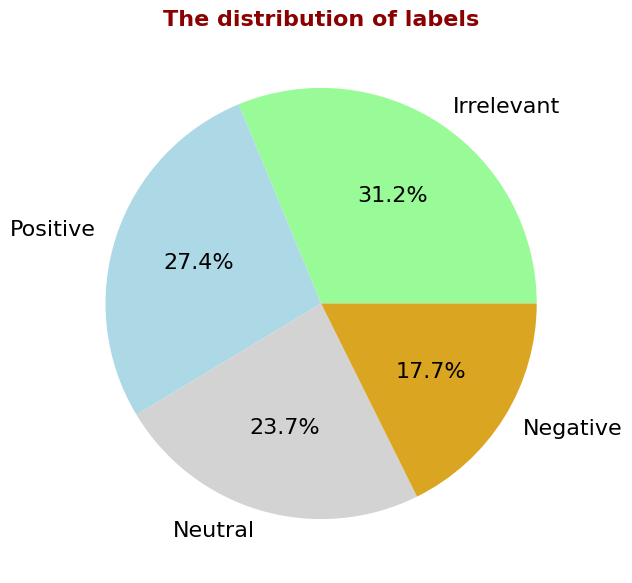

In [6]:
percentages = (df['Emotion'].value_counts() / df['Emotion'].count()) * 100

# Configure plot
plt.figure(figsize=(7, 7))
plt.pie(percentages, labels=df['Emotion'].unique(), colors=['#98FB98', '#ADD8E6', 'LightGrey', '#DAA520'], autopct='%1.1f%%', textprops={'fontsize': 16})  # Adjust font size as needed
plt.title('The distribution of labels', color = '#8B0000', fontsize = 16, fontweight = 'bold')
plt.show()

In [7]:
import random

# ANSI color codes
color_codes = {
    "blue": 34,
    "green": 32,
    "red": 31,
    "purple": 35,
    "orange": 33,  
    "yellow": 33,
    "pink": 35,   
    "brown": 33,  
    "gray": 37
}

for i in range(0, len(df), 7):
    color = random.choice(list(color_codes.values()))
    print(f"\033[1;{color}mThe comment is: {df['Comment'][i]}\033[0m\n\033[1;{color}mIt's Label is: {df['Emotion'][i]}\033[0m\n")
    if i > 30:
        break

The comment is: I Come stop by sometime and say hi for my monthly 1st edition LIVE stream tonight at 10pm... pst! Late Nights with Nicci _ Luv. I will be on teaming up with @Legacy_Mirror for some famous Fortnite Dance Duos. Hope to see as you are all there!
It's Label is: Irrelevant

The comment is: Apparently AMD is offering free training with a voucher for another cert test afterwards. Currently based on AWS but seems like a great opportunity to get into azure
It's Label is: Positive

The comment is: New two-year season! Well I know I'll have a good cold @ GFuelEnergy can nourish me.
It's Label is: Positive

The comment is: Happy Birthday to Brave! 11th 12 / 6 / 2020. 12 / 6 / 2009-12 / 6 / 2020.
It's Label is: Neutral

The comment is: 5 Just tried @GhostRecon_UK for the first time out in months and it'z s still a bug riddled mess. Seriously guy just abandon playing it and never move on. It'l s dead even now.
It's Label is: Negative

The comment is: If it were up to me, Overwatch ma

# Preprocessing

In [8]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [9]:
doc=df['Comment'][1000]
doc

"little ol screenshot from gaben's account of me redd.it/hu2ks9"

## Tokeniazation

In [10]:
txt=nlp(doc)
txt

little ol screenshot from gaben's account of me redd.it/hu2ks9

In [11]:
for token in txt:
    print(token)

little
ol
screenshot
from
gaben
's
account
of
me
redd.it/hu2ks9


## Stemming & lemmatization

In [12]:
for token in txt:
    print(f"Word: {token}  -> {token.lemma_}")

Word: little  -> little
Word: ol  -> ol
Word: screenshot  -> screenshot
Word: from  -> from
Word: gaben  -> gaben
Word: 's  -> 's
Word: account  -> account
Word: of  -> of
Word: me  -> I
Word: redd.it/hu2ks9  -> redd.it/hu2ks9


In [13]:
for token in txt:
    if token.is_stop:
        print(token)

from
's
of
me


In [14]:
def processing(txt):
    preprocess_txt=[]
    doc=nlp(txt)
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        preprocess_txt.append(token.lemma_)    
    return " ".join(preprocess_txt)    

print(doc)
process_doc=processing(doc)
print("\n",process_doc)

little ol screenshot from gaben's account of me redd.it/hu2ks9

 little ol screenshot gaben account redd.it/hu2ks9


In [15]:
df['preprocess_comment']=df['Comment'].apply(processing)

In [16]:
df['num_emotion']=df['Emotion'].map({'Negative':0,'Positive':1,'Neutral':2, 'Irrelevant' : 3})
df.head()

,Comment,Emotion,preprocess_comment,num_emotion
0,I Come stop by sometime and say hi for my mont...,Irrelevant,come stop hi monthly 1st edition LIVE stream t...,3
1,"Remember when he shoved a remote in the ass, h...",Irrelevant,remember shove remote ass angry World Warcraft...,3
2,Can't wait to see @ ellenlikesbikes!!!!.... ah...,Irrelevant,wait ellenlikesbike ahem JeremyPowers like,3
3,"@Borderlands Loving, Love, Love, More and More...",Positive,@Borderlands Loving Love Love Love odd float t...,1
4,Crying. the fact overwatch is nominated means...,Irrelevant,cry fact overwatch nominate mean SHIT queer ...,3


In [17]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df['preprocess_comment'],df['num_emotion'],test_size=0.2
                                              ,random_state=42,stratify=df['num_emotion'])

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

TF=TfidfVectorizer()
x_train_tf=TF.fit_transform(x_train)
x_test_tf=TF.transform(x_test)

# Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train_tf,y_train)

ypred=rf.predict(x_test_tf)

## Evalution

In [20]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay

print(accuracy_score(y_test,ypred))

0.6633064516129032


In [21]:
print(confusion_matrix(y_test, ypred))

[[491  56  62  11]
 [ 93 370  70  10]
 [ 76  75 306  14]
 [ 74  71  56 149]]


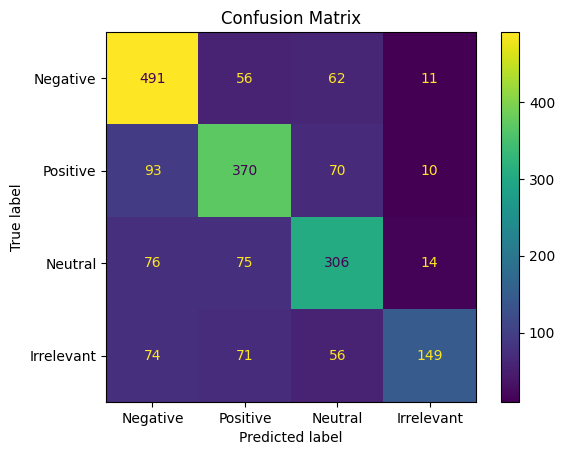

In [22]:
label_names = {'Negative': 0, 'Positive': 1, 'Neutral': 2, 'Irrelevant': 3}

cm_display = ConfusionMatrixDisplay.from_predictions(y_test, ypred, display_labels=label_names.keys())

#cm_display.plot(cmap='Blues', xticks_rotation=45)
plt.title('Confusion Matrix')
plt.show()

In [23]:
from sklearn.metrics import classification_report

label_names = {'Negative': 0, 'Positive': 1, 'Neutral': 2, 'Irrelevant': 3}

report = classification_report(y_test, ypred, target_names=label_names.keys())

print(report)

              precision    recall  f1-score   support

    Negative       0.67      0.79      0.73       620
    Positive       0.65      0.68      0.66       543
     Neutral       0.62      0.65      0.63       471
  Irrelevant       0.81      0.43      0.56       350

    accuracy                           0.66      1984
   macro avg       0.69      0.64      0.65      1984
weighted avg       0.68      0.66      0.66      1984



In [24]:
from sklearn.metrics import classification_report
from prettytable import PrettyTable

label_names = {'Negative': 0, 'Positive': 1, 'Neutral': 2, 'Irrelevant': 3}

report = classification_report(y_test, ypred, target_names=label_names.keys(), output_dict=True)

table = PrettyTable()

# Set the header of the table
table.field_names = ["Class", "Precision", "Recall", "F1-score", "Support"]

for class_name, metrics in report.items():
    if isinstance(metrics, dict):  
        row = [class_name, metrics['precision'], metrics['recall'], metrics['f1-score'], metrics['support']]
        table.add_row(row)

print(table.get_string(style="BLUE"))

+--------------+--------------------+--------------------+--------------------+---------+
|    Class     |     Precision      |       Recall       |      F1-score      | Support |
+--------------+--------------------+--------------------+--------------------+---------+
|   Negative   | 0.6689373297002725 | 0.7919354838709678 | 0.725258493353028  |   620   |
|   Positive   | 0.6468531468531469 | 0.6813996316758748 | 0.6636771300448431 |   543   |
|   Neutral    | 0.6194331983805668 | 0.6496815286624203 | 0.6341968911917097 |   471   |
|  Irrelevant  | 0.8097826086956522 | 0.4257142857142857 | 0.5580524344569288 |   350   |
|  macro avg   | 0.6862515709074096 | 0.6371827324808872 | 0.6452962372616274 |   1984  |
| weighted avg | 0.6759875769335447 | 0.6633064516129032 | 0.6572893323107095 |   1984  |
+--------------+--------------------+--------------------+--------------------+---------+


# SVM with GridSearchCv

In [25]:
X = df['preprocess_comment']
y = df['Emotion']

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([0, 0, 0, ..., 3, 3, 1])

In [28]:
from sklearn.svm import SVC

param_grid = {'kernel': ['rbf'],
              'C': [0.1, 1, 10, 15],
            'random_state':[42]}

svc = SVC()

In [29]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(svc, param_grid, cv=10)
grid_search.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 15], 'kernel': ['rbf'],
                         'random_state': [42]})

In [30]:
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)
print(f"Best model Accuracy Score is :{grid_search.best_score_}")

Best hyperparameters: {'C': 10, 'kernel': 'rbf', 'random_state': 42}
Best model Accuracy Score is :0.706722905341623


In [31]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)
y_pred

array([0, 0, 0, ..., 3, 3, 1])

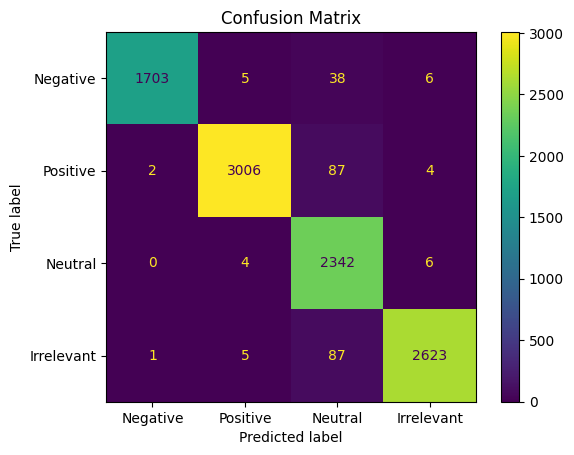

In [32]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay

label_names = {'Negative': 0, 'Positive': 1, 'Neutral': 2, 'Irrelevant': 3}

cm_display = ConfusionMatrixDisplay.from_predictions(y, y_pred, display_labels=label_names.keys())

plt.title('Confusion Matrix')
plt.show()